In [22]:
# Import useful packages
import pandas as pd
pd.set_option('max_rows', 10)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels 
import seaborn as sns 
#some libraries here are required to call on other useful functions needed in the calculations, like regression model function.

%matplotlib notebook #to make my graphs interactive

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

#data = pandas.read_csv("soil_observations.csv") # requires file to be loaded in the directory
data = pd.read_csv("vostok-temperature-data.csv")
data = data.drop([0])
data


,depth,ice_age,gas_age,CO2,Temperature (calculated)
1,130,4.26,1.9,274,-55.32333333
2,140,4.66,2.28,273.07,-54.82333333
3,150,5.06,2.66,272.14,-55.45333333
4,160,5.45,3.04,271.22,-55.81333333
5,170,5.85,3.41,270.29,-54.62833333
...,...,...,...,...,...
190,2020,154.02,149.8,198.55,-63.96666667
191,2030,155.7,151.45,198.89,-64.67833333
192,2040,157.38,153.18,195.15,-64.18
193,2050,159.05,154.92,191.41,-64.92333333


In [59]:

data = data.astype(float) #converting the value to float so that they can be used in calculations 
display('-'*100)
display(data.isnull().any())

data.describe() #a data summary 

'----------------------------------------------------------------------------------------------------'

depth                       False
ice_age                     False
gas_age                     False
CO2                         False
Temperature (calculated)    False
dtype: bool

,depth,ice_age,gas_age,CO2,Temperature (calculated)
count,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1095.000000,74.776753,71.440464,229.595000,-60.393754
std,561.471282,45.029345,45.165187,27.862282,3.219861
min,130.000000,4.260000,1.900000,179.860000,-65.271667
25%,612.500000,35.567500,31.735000,204.667500,-62.841667
50%,1095.000000,73.980000,70.220000,226.345000,-61.158333
75%,1577.500000,114.045000,110.722500,254.917500,-58.640417
max,2060.000000,160.730000,156.650000,291.710000,-52.330000


In [60]:
#checking for multicollinearity 
corr = data.corr()

# display the correlation matrix
display(corr)

#creating an arbitary data frame for my heatmap 
dfs = pd.DataFrame(data, columns = ['depth','ice_age','gas_age','CO2','Temperature (calculated)'])
corrMatrix = dfs.corr()
sns.heatmap(corrMatrix, cmap='Blues', annot=True)
plt.show()

,depth,ice_age,gas_age,CO2,Temperature (calculated)
depth,1.000000,0.999071,0.998855,0.223354,0.124536
ice_age,0.999071,1.000000,0.999915,0.234052,0.134236
gas_age,0.998855,0.999915,1.000000,0.245538,0.145699
CO2,0.223354,0.234052,0.245538,1.000000,0.810425
Temperature (calculated),0.124536,0.134236,0.145699,0.810425,1.000000


<IPython.core.display.Javascript object>


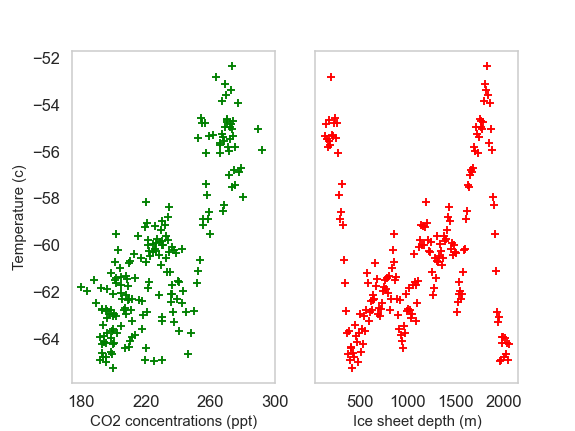

In [26]:
#scatter plots 
temp = data["Temperature (calculated)"]
co2 = data["CO2"]
depth = data["depth"]

#ax1.set_title('Sharing Y axis')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) #command for creating both the graphs side by, sharing one y-axis
ax1.scatter(co2, temp, color = 'green', marker = '+')
ax2.scatter(depth, temp, marker='+', color = 'red')
ax1.set_xlabel('CO2 concentrations (ppt)', size=12)
ax2.set_xlabel('Ice sheet depth (m)', size=12)
ax1.set_ylabel('Temperature (c)', size=12)
ax1.set_xticks([180,220,260,300])
ax2.set_xticks([500, 1000, 1500, 2000])
ax1.grid(False)
ax2.grid(False)

plt.show()



In [27]:
#the following code is taken from CS51 session 2.2 
def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''

    # If there is only one predictor variable, plot the regression line. I use this later to find R2 values 
    if len(column_x)==1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='orange')
    
    # define predictors X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    
    # uses the statsmodel library to construct a regression model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"

    # creates a residual plot for the data:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='green')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    
    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

<IPython.core.display.Javascript object>


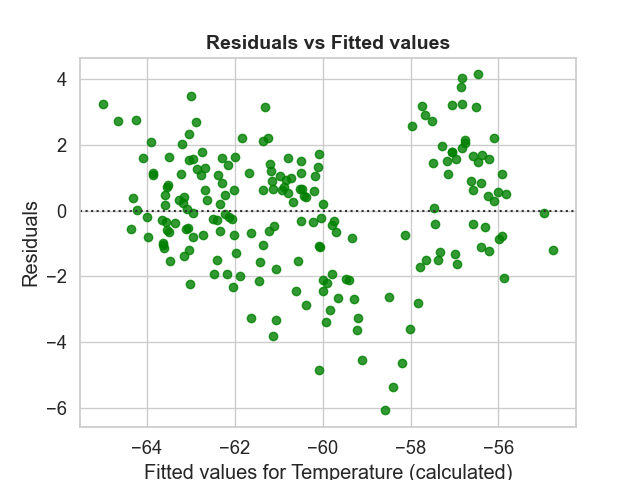

<IPython.core.display.Javascript object>


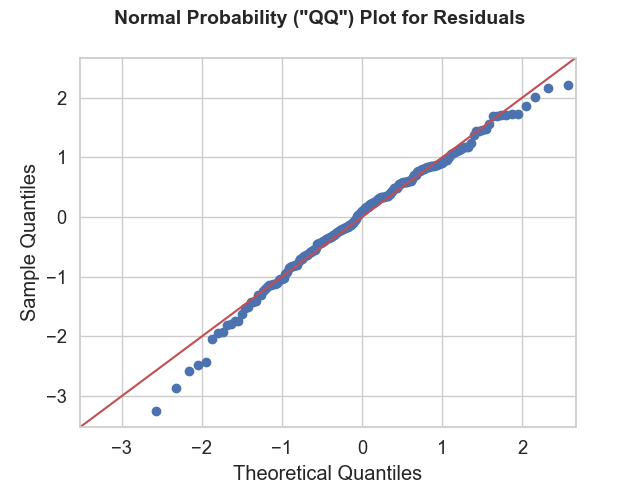

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Temperature (calculated)   R-squared:                       0.660
Model:                                  OLS   Adj. R-squared:                  0.657
Method:                       Least Squares   F-statistic:                     185.5
Date:                      Sun, 31 Jan 2021   Prob (F-statistic):           1.73e-45
Time:                              15:01:58   Log-Likelihood:                -396.94
No. Observations:                       194   AIC:                             799.9
Df Residuals:                           191   BIC:                             809.7
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -81.8756      1.127    -72.618      0.000     -84.100     -79.652
depth         -0.0003      0.000     -1.374      0.171      -0.001       0.000
CO2            0.0952      0.005     19.034      0.000       0.085       0.105
==============================================================================
Omnibus:                        6.642   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.358
Skew:                          -0.429   Prob(JB):                       0.0416
Kurtosis:                       3.226   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
mult_regression(['depth','CO2'],'Temperature (calculated)')
regressionmodel.summary()

<IPython.core.display.Javascript object>


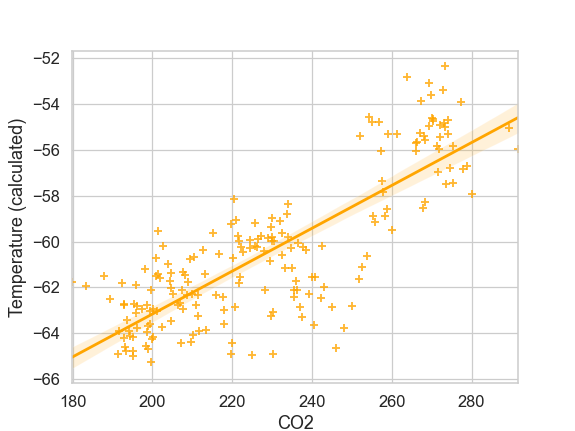

<IPython.core.display.Javascript object>


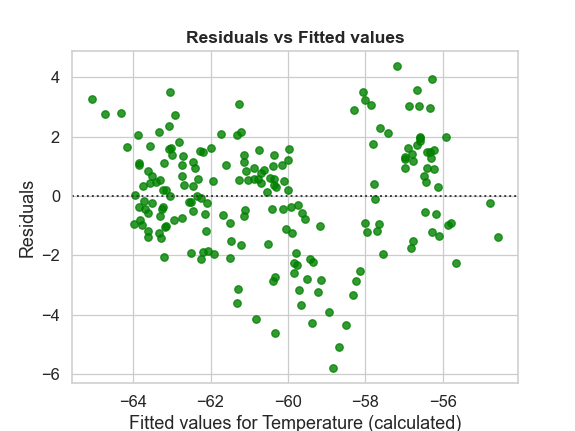

<IPython.core.display.Javascript object>


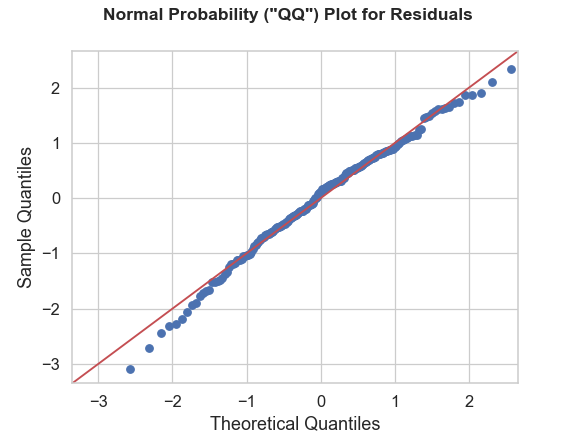

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Temperature (calculated)   R-squared:                       0.657
Model:                                  OLS   Adj. R-squared:                  0.655
Method:                       Least Squares   F-statistic:                     367.4
Date:                      Mon, 01 Feb 2021   Prob (F-statistic):           1.84e-46
Time:                              20:51:10   Log-Likelihood:                -397.89
No. Observations:                       194   AIC:                             799.8
Df Residuals:                           192   BIC:                             806.3
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -81.8966      1.130    -72.476      0.000     -84.125     -79.668
CO2            0.0937      0.005     19.168      0.000       0.084       0.103
==============================================================================
Omnibus:                        4.431   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.268
Skew:                          -0.363   Prob(JB):                        0.118
Kurtosis:                       3.029   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
#for linear regression of each predictor.
mult_regression(['CO2'],'Temperature (calculated)')
regressionmodel.summary()


With all the four predictors, the R2 value was high but the P values for two of the variables was quite high. As previously seen, ice age and gas age very closely correlated, which means they are inducing multicollinearity in the system. Removing them brings down the R2 value but significantly lower the P value

We use the backward selection here to confirm our choice of removing the two variables. 


<IPython.core.display.Javascript object>


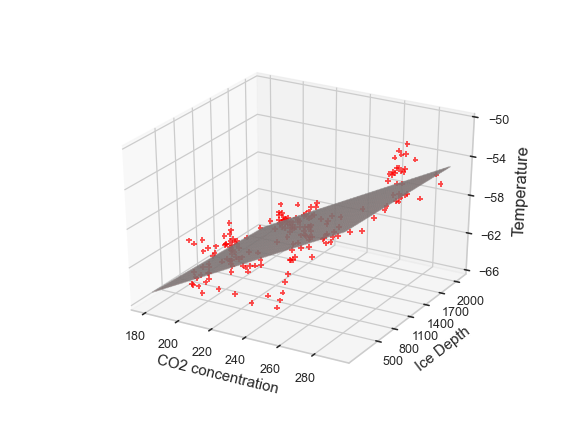

In [63]:
#importing all the necessary libraries for easy and quick reference 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import axes3d

#importing the data again and converting it into float values
df = pd.read_csv("vostok-temperature-data.csv")
df = df.drop([0])
df = df.astype(float)

#making lists for easy access
temp = data["Temperature (calculated)"]
co2 = data["CO2"]
depth = data["depth"]

#creates the regression model again
model = smf.ols(formula='temp ~ co2 + depth', data=df)
results_formula = model.fit() #fits the model
results_formula.params

#creates the grid for the graph by specifying what limits of the axis
x_surf, y_surf = np.meshgrid(np.linspace(co2.min(), co2.max(), 100),np.linspace(depth.min(), depth.max(), 100))
onlyX = pd.DataFrame({'co2': x_surf.ravel(), 'depth': y_surf.ravel()})
fittedY= results_formula.predict(exog=onlyX)

## converts the predicted result in an array
fittedY=np.array(fittedY)

# creates a Visualization of the Data for Multiple Linear Regression
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['CO2'],df['depth'],df['Temperature (calculated)'],c='red', marker='+', alpha=0.7)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape),color='brown', alpha=0.3, edgecolor='grey')

plt.yticks(fontsize=10) 
plt.xticks(fontsize=10) 

ax.set_zticks([-66,-62,-58,-54,-50])
ax.set_yticks([500, 800, 1100, 1400, 1700, 2000])
# change fontsize
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
# disable auto rotation
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('Temperature', fontsize=13, rotation = 87)
ax.set_xlabel('CO2 concentration', fontsize=12, rotation = 35)
ax.set_ylabel('Ice Depth', size= 12)
label = 'CO2 concentration'

plt.show()

In [46]:
data.describe()

sy = 3.219861
sx1 = 27.862282
sx2 = 561.471282
r1 = 0.657
r2 = 0.016
dof = 194 - 2

def SE(s1, s2, r): #function to calculate the standard error for variables
    a = (s1/s2)
    b = ((1 - r)/dof)**0.5
    return(a * b)

b1 = (sy/sx1) * 0.810425  #finding the point estimate (the slope)
b2 = (sy/sx2) * 0.124536

#signifiance level 
alpha = 0.05/2 #bonferroni correction because multiple regression has more than one trial 

Tscore1 = b1/(SE(sy, sx1, r1))  #this is the basic formula to find a t-value (x1 - x2)/standard error
Tscore2 = b2/(SE(sy, sx2, r2))
pvalue1 = 2*stats.t.cdf(-Tscore1,dof) 
pvalue2 = 2*stats.t.cdf(-Tscore2, dof)
#the above function calculates the area under the curve of t-distribution curve. 
#As the distribution is symmetric, -t is used to calculate the area outside the percentile area. 

print(b1)
print(b2)
print("Pvalue of Co2 =", pvalue1)
print("Pvalue of depth =", pvalue2)
print("t-score of Co2 =", Tscore1)
print("t-socre of depth =",Tscore2)
print(SE(sy, sx1, r1))
print(SE(sy, sx2, r2))

0.09365549637768363
0.0007141747447307554
Pvalue of Co2 = 1.7654306163039316e-46
Pvalue of depth = 0.08353280939203087
t-score of Co2 = 19.174161631886655
t-socre of depth = 1.7395943062792036
0.004884463695243625
0.0004105409762223784
